# Visualise mlst types

ggtree v3.16.0 Learn more at https://yulab-smu.top/contribution-tree-data/

Please cite:

Shuangbin Xu, Lin Li, Xiao Luo, Meijun Chen, Wenli Tang, Li Zhan, Zehan
Dai, Tommy T. Lam, Yi Guan, Guangchuang Yu. Ggtree: A serialized data
object for visualization of a phylogenetic tree and annotation data.
iMeta 2022, 1(4):e56. doi:10.1002/imt2.56


Attaching package: ‘ggtree’


The following object is masked from ‘package:ape’:

    rotate



Attaching package: ‘dplyr’


The following object is masked from ‘package:ape’:

    where


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidyr’


The following object is masked from ‘package:ggtree’:

    expand


Rows: 3084 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): tube_code
dbl (4): PATIENT_ID, death_7_day, death_14_day, death_30_day

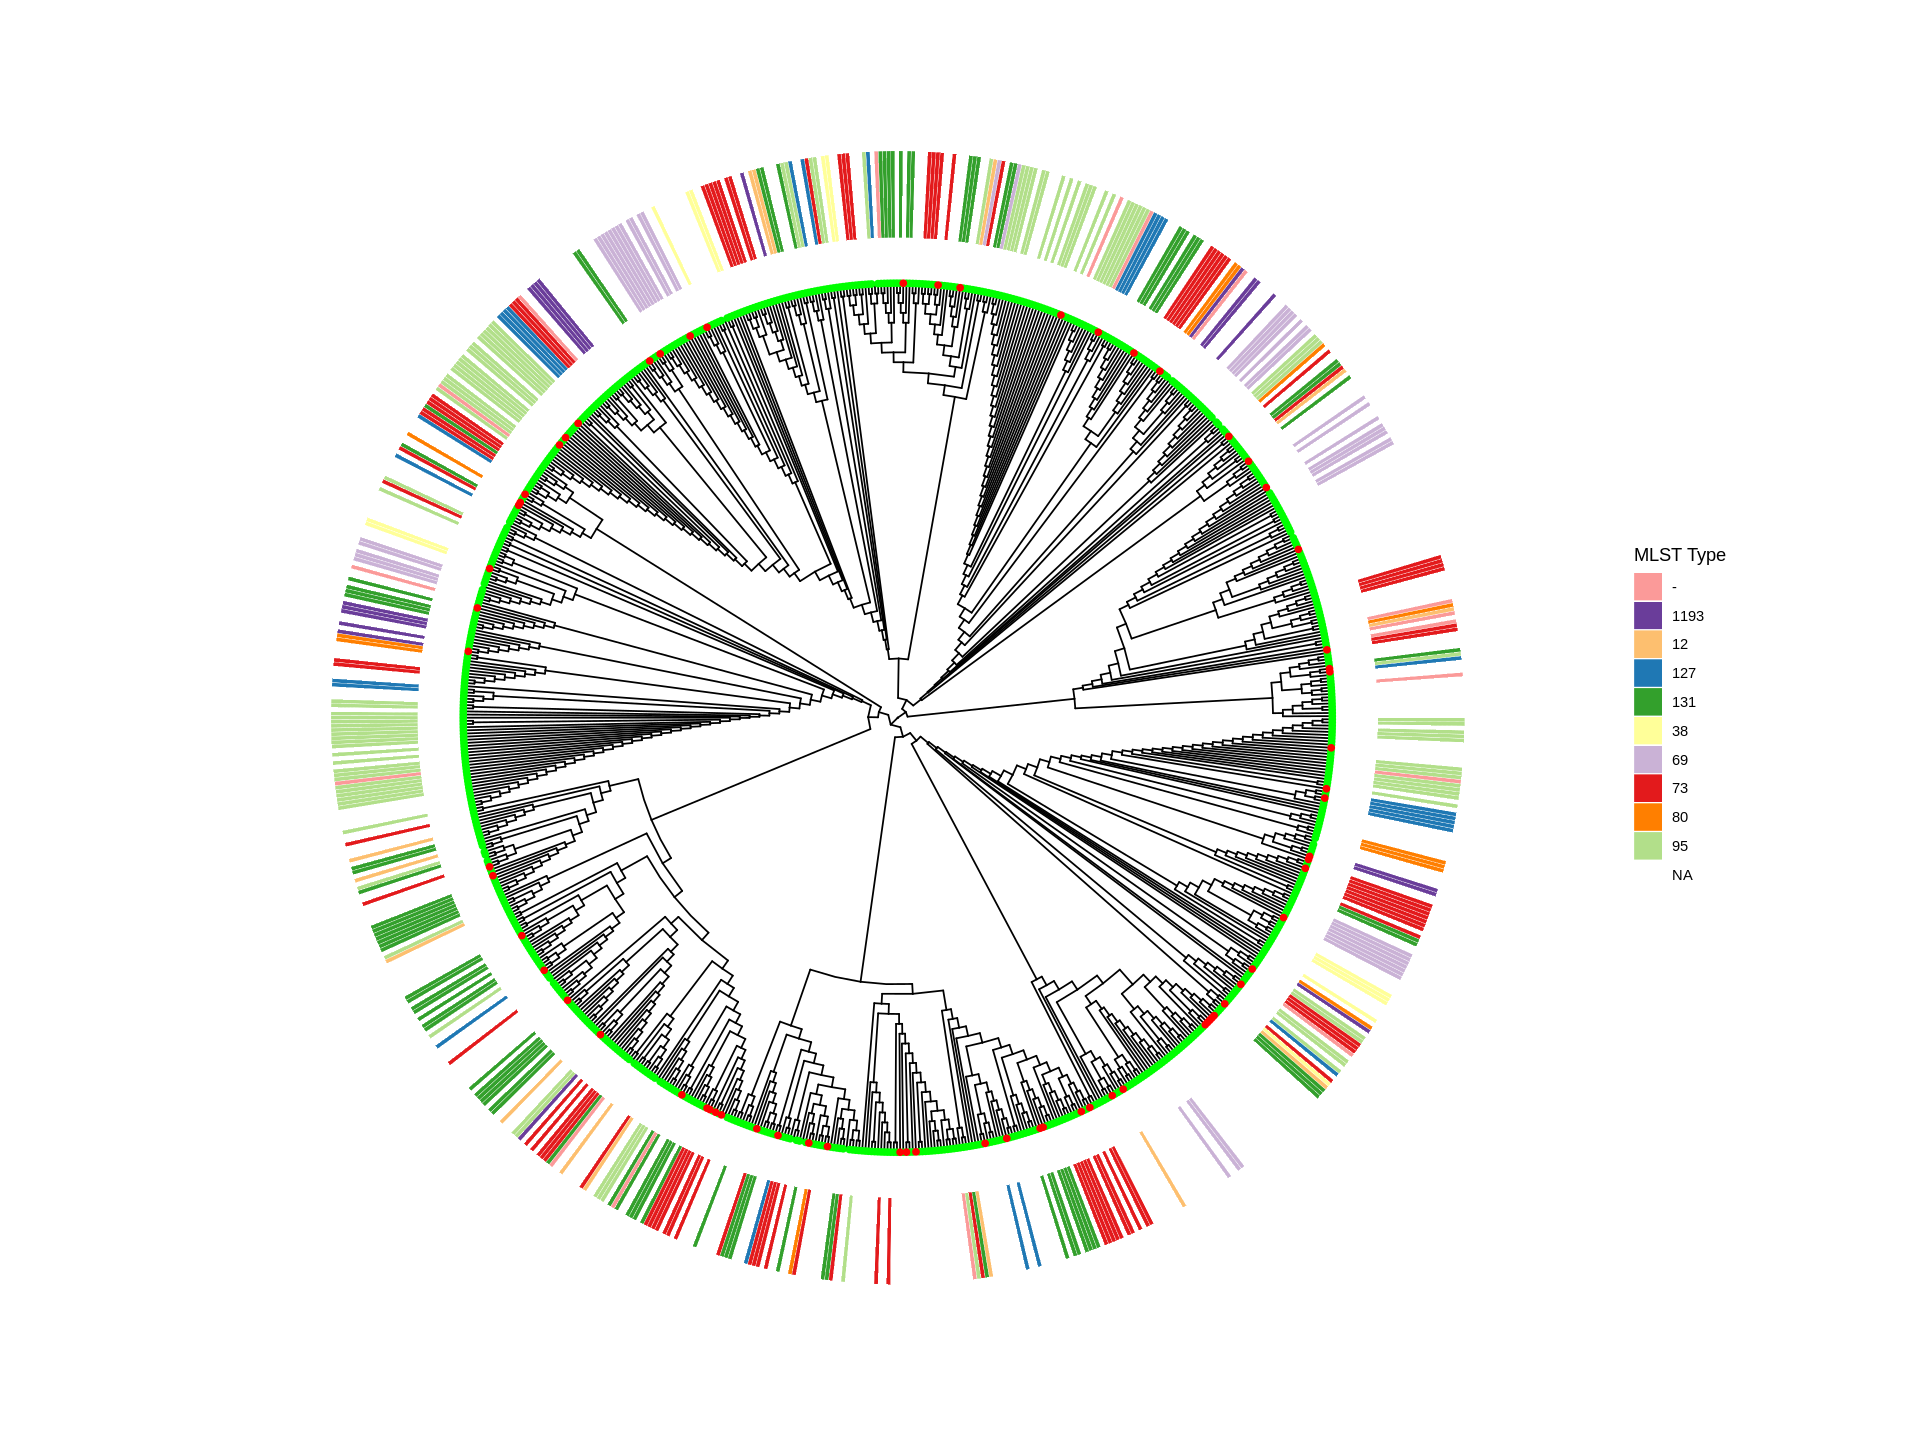

In [1]:
options(repr.plot.width = 16, repr.plot.height = 12)

library(ape)
library(ggtree)
library(ggplot2)
library(dplyr)
library(readr)
library(tidyr)
library(RColorBrewer)

tree <- read.tree(
  "~/workspace/genome_data/annotations/e_coli/gene_sequences/fep_system/tree.nwk"
)

mortality_df <- read_csv(
  "~/workspace/ehr_data/data/full_cohort/tube_id_mortality_labels.csv"
)

mlst_df <- read_csv(
  "~/workspace/genome_data/annotations/e_coli/mlst/mlst_ecoli.csv"
)

df <- data.frame(tube_code = tree$tip.label)

p <- ggtree(tree, branch.length = "none")

tree_data <- p$data

tree_data <- tree_data %>%
  mutate(tip = ifelse(isTip, label, NA))

tree_data <- left_join(tree_data, mortality_df, by = c("tip" = "tube_code"))

tree_data$death_7_day_color <- ifelse(
  tree_data$isTip, ifelse(tree_data$death_7_day == "1", "red", "green"), "black"
)

heatmap_data <- df %>%
  left_join(mlst_df, by = "tube_code")

circ <- ggtree(tree, layout = "circular", branch.length = "none")

rownames(heatmap_data) <- heatmap_data$tube_code

mlst_levels <- unique(heatmap_data$mlst_type)
n_levels <- length(mlst_levels)

pastel_palette <- brewer.pal(n = n_levels, name = "Paired")

names(pastel_palette) <- mlst_levels

p <- gheatmap(
  circ,
  heatmap_data %>% select(mlst_type),
  offset = .2,
  width = .2,
  colnames = FALSE
) %<+% tree_data +
  geom_tippoint(aes(color = I(death_7_day_color))) +
  scale_fill_manual(
    values = pastel_palette,
    name = "MLST Type",
    na.value = "white"
  )

p